A/B-тестирование анализ двух маркетинговых стратегий для выбора лучшей маркетинговой стратегии, которая может эффективно и действенно конвертировать больше трафика в продажи (или больше трафика в желаемую цель).

In [1]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

control_data = pd.read_csv("control_group.csv", sep = ";")
test_data = pd.read_csv("test_group.csv", sep = ";")

In [2]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [7]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent",
                        "Number of Impressions", "Reach", "Website Clicks",
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent",
                        "Number of Impressions", "Reach", "Website Clicks",
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [8]:
control_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [10]:
print(control_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64


In [11]:
print(test_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


In [12]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(), inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), inplace=True)

<ipython-input-12-fdebdb51b477>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), inplace=True)
<ipython-input-12-fdebdb51b477>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [14]:
ab_data = control_data.merge(test_data, how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
ab_data.head()

<ipython-input-14-b7f658bf7ad2>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data = control_data.merge(test_data, how="outer").sort_values(["Date"])


,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
3,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
4,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


In [15]:
ab_data["Campaign Name"].value_counts()

,count
Campaign Name,
Control Campaign,30
Test Campaign,30


In [54]:
figure = px.scatter(data_frame = ab_data, x="Number of Impressions", y="Amount Spent", size="Amount Spent", color= "Campaign Name")
figure.show()

In [44]:
label = ["Total Searches from Control Campaign", "Total Searches from Test Campaign"]
counts = [sum(control_data["Searches Received"]), sum(test_data["Searches Received"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Searches')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=3)))

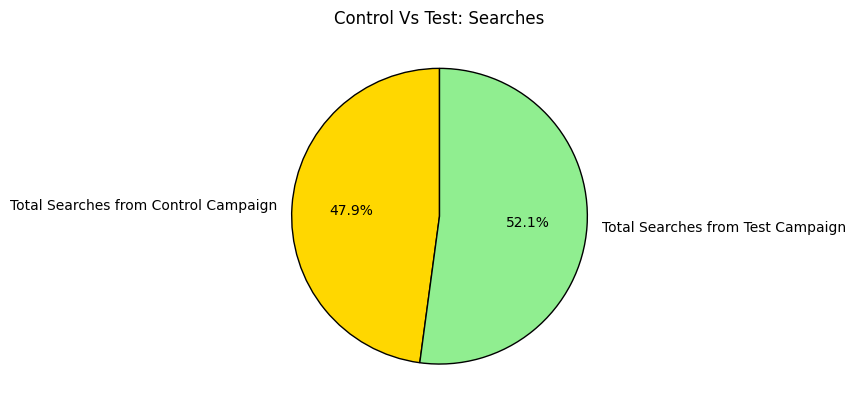

In [47]:
import matplotlib.pyplot as plt

labels = ["Total Searches from Control Campaign", "Total Searches from Test Campaign"]
counts = [sum(control_data["Searches Received"]), sum(test_data["Searches Received"])]
colors = ['gold', 'lightgreen']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Control Vs Test: Searches')
plt.show()


In [49]:
label = ["Website Clicks from Control Campaign", "Website Clicks from Test Campaign"]
counts = [sum(control_data["Website Clicks"]), sum(test_data["Website Clicks"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Website Clicks')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

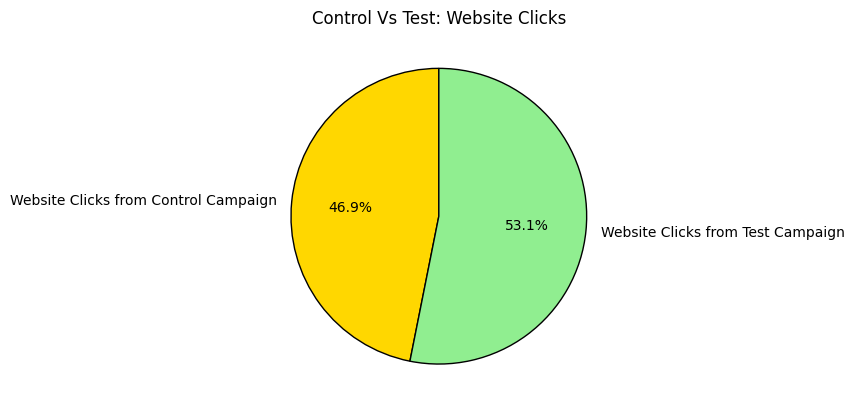

In [50]:
import matplotlib.pyplot as plt
labels = ["Website Clicks from Control Campaign", "Website Clicks from Test Campaign"]
counts = [sum(control_data["Website Clicks"]), sum(test_data["Website Clicks"])]
colors = ['gold', 'lightgreen']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Control Vs Test: Website Clicks')
plt.show()


In [51]:
label = ["Content Viewed from Control Campaign", "Content Viewed from Test Campaign"]
counts = [sum(control_data["Content Viewed"]), sum(test_data["Content Viewed"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Content Viewed')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [52]:
label = ["Content Viewed from Control Campaign", "Content Viewed from Test Campaign"]
counts = [sum(control_data["Content Viewed"]), sum(test_data["Content Viewed"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Content Viewed')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [55]:
figure = px.scatter(data_frame = ab_data, x="Content Viewed", y="Website Clicks", size="Website Clicks", color= "Campaign Name")
figure.show()

In [56]:
figure = px.scatter(data_frame = ab_data, x="Added to Cart", y="Content Viewed", size="Added to Cart", color= "Campaign Name")
figure.show()

In [57]:
figure = px.scatter(data_frame = ab_data, x="Purchases", y="Added to Cart", size="Purchases", color= "Campaign Name")
figure.show()

Из приведенных выше A/B-тестов обнаружено, что контрольная кампания привела к увеличению продаж и вовлеченности посетителей. Больше продуктов было просмотрено в контрольной кампании, что привело к большему количеству продуктов в корзине и большему количеству продаж. Но скорость разговора о продуктах в корзине выше в тестовой кампании. Тестовая кампания привела к большему количеству продаж в соответствии с просмотренными и добавленными в корзину продуктами. А контрольная кампания приводит к большему количеству продаж в целом. Таким образом, тестовая кампания может использоваться для продвижения определенного продукта определенной аудитории, а контрольная кампания может использоваться для продвижения нескольких продуктов более широкой аудитории.